In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet

In [11]:
search = pd.read_csv('data/AMSSearch.csv')
search_details = pd.read_csv('data/AMSSearchDetail.csv')

In [57]:
search[search.id == 11816]

,Unnamed: 0,id,ad_group,target,search_term,campaign,term,match_type
11825,11825,11816,4901,62772,clean well,1239,clean well,EXACT


In [55]:
search_details.search_id.value_counts()

11864    106
11816     76
364       72
11809     71
11939     68
        ... 
26501      1
22403      1
24450      1
14207      1
12210      1
Name: search_id, Length: 14717, dtype: int64

In [33]:
search_details = search_details.sort_values(by='date')

In [58]:
data = search_details[search_details.search_id == 11816]
data

,search_id,date,impressions,clicks,CTR,CpC,spend,ACoS,RoAS,sales,orders,units,conversions_rate,advertised_asin_units,advertised_asin_sales,advertised_brand_units,advertised_brand_sales
21201,11816,1/1/20,127,1,0.007874,0.60,0.60,NaN,0.0000,0.00,0,0,0.000000,0,0.00,0,0.0
22457,11816,1/10/20,28,1,0.035714,0.91,0.91,0.063238,0.1581,14.39,1,1,1.000000,1,14.39,0,0.0
23527,11816,1/13/20,27,1,0.037037,0.91,0.91,0.063238,0.1581,14.39,1,1,1.000000,1,14.39,0,0.0
23528,11816,1/14/20,41,1,0.024390,0.32,0.32,NaN,0.0000,0.00,0,0,0.000000,0,0.00,0,0.0
23529,11816,1/16/20,42,2,0.047619,0.91,1.82,0.126477,0.0791,14.39,1,1,0.500000,1,14.39,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27566,11816,2/2/20,12,3,0.250000,0.39,1.17,0.034946,0.2862,33.48,1,2,0.333333,2,33.48,0,0.0
27567,11816,2/3/20,48,2,0.041667,0.87,1.74,0.103943,0.0962,16.74,1,1,0.500000,1,16.74,0,0.0
27568,11816,2/4/20,44,4,0.090909,0.89,3.57,NaN,0.0000,0.00,0,0,0.000000,0,0.00,0,0.0
27569,11816,2/5/20,49,3,0.061224,0.93,2.80,NaN,0.0000,0.00,0,0,0.000000,0,0.00,0,0.0


In [59]:
fig = px.line(data, x='date', y='clicks')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [60]:
df = data[['clicks', 'date']].rename(columns={"clicks": "y", "date": "ds"})
m = Prophet()

In [61]:
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
436,2021-02-01
437,2021-02-02
438,2021-02-03
439,2021-02-04
440,2021-02-05


In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
436,2021-02-01,2.426607,1.092478,3.696881
437,2021-02-02,2.687550,1.346989,3.998543
438,2021-02-03,2.714750,1.396717,4.007786
439,2021-02-04,1.938226,0.608163,3.161322
440,2021-02-05,2.255623,0.796840,3.610832


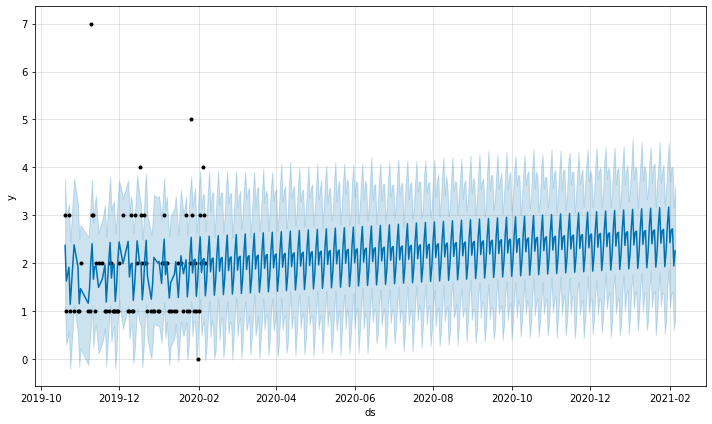

In [63]:
fig1 = m.plot(forecast)

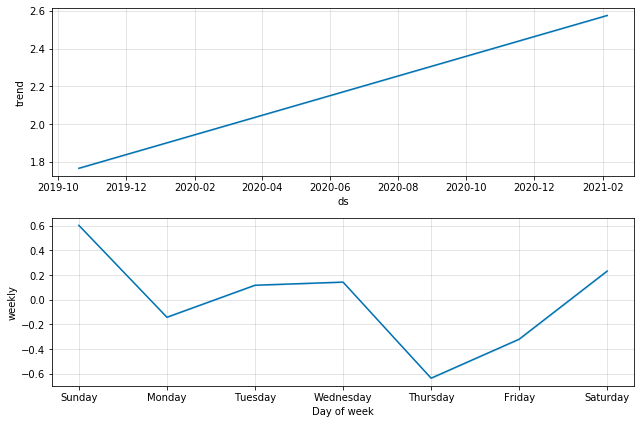

In [64]:
fig2 = m.plot_components(forecast)

In [65]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [66]:
plot_components_plotly(m, forecast)

In [72]:
search_details.groupby(search_details.search_id).sum().sort_values(by='sales', ascending = False)

,impressions,clicks,CTR,CpC,spend,ACoS,RoAS,sales,orders,units,conversions_rate,advertised_asin_units,advertised_asin_sales,advertised_brand_units,advertised_brand_sales
search_id,,,,,,,,,,,,,,,
11864,7050,400,6.548456,97.58,379.87,13.605311,10.6047,3635.92,213,281,57.375752,250,3100.71,31,535.21
16880,3719,254,4.349010,64.78,283.12,5.689777,5.7621,2988.74,151,161,32.363889,128,2531.11,33,457.63
364,4331,292,5.496748,76.58,317.88,9.856017,6.6942,2455.77,165,234,41.533730,192,1965.82,42,489.95
11802,3839,127,2.573854,66.21,121.42,2.557149,14.8100,1848.71,68,147,37.589278,114,1153.75,33,694.96
12081,5632,169,3.576888,54.89,160.96,3.405529,7.2994,1760.56,75,89,26.316666,68,1430.73,21,329.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,2,1,0.500000,1.83,1.83,0.000000,0.0000,0.00,0,0,0.000000,0,0.00,0,0.00
10385,1,1,1.000000,0.62,0.62,0.000000,0.0000,0.00,0,0,0.000000,0,0.00,0,0.00
10395,1,1,1.000000,1.14,1.14,0.000000,0.0000,0.00,0,0,0.000000,0,0.00,0,0.00


In [300]:
search_details.groupby(search_details.search_id).mean().sort_values(by=['RoAS', 'sales'], ascending = False)

,impressions,clicks,CTR,CpC,spend,ACoS,RoAS,sales,orders,units,conversions_rate,advertised_asin_units,advertised_asin_sales,advertised_brand_units,advertised_brand_sales,ad_group,campaign
search_id,,,,,,,,,,,,,,,,,
27669,11.0,1.0,0.090909,0.15,0.15,0.000783,12.76800,191.520,1.0,8.0,1.0,0.0,0.000,8.0,191.52,4758.0,1246.0
26555,123.0,1.0,0.008130,0.29,0.29,0.000949,10.54140,305.700,1.0,15.0,1.0,15.0,305.700,0.0,0.00,4901.0,1239.0
10824,1.0,1.0,1.000000,0.02,0.02,0.002107,4.74500,9.490,1.0,1.0,1.0,0.0,0.000,1.0,9.49,491.0,1244.0
25494,14.5,1.0,0.094156,0.36,0.36,0.012640,4.50215,117.115,2.0,24.0,2.0,1.5,42.765,22.5,74.35,4929.0,1237.0
1882,1.0,1.0,1.000000,0.02,0.02,0.002535,3.94500,7.890,1.0,1.0,1.0,1.0,7.890,0.0,0.00,491.0,1244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,13.0,0.0,0.000000,NaN,0.00,0.000000,NaN,2.640,1.0,1.0,NaN,1.0,2.640,0.0,0.00,196.0,1231.0
741,4.0,0.0,0.000000,NaN,0.00,0.000000,NaN,2.640,1.0,1.0,NaN,1.0,2.640,0.0,0.00,1.0,1240.0
3973,14.0,0.0,0.000000,NaN,0.00,0.000000,NaN,2.640,1.0,1.0,NaN,1.0,2.640,0.0,0.00,1.0,1240.0


In [299]:
search[search.id == 27669]

,Unnamed: 0,id,ad_group,target,search_term,campaign,term,match_type
9219,9219,27669,4758,215851,cleanwell botanical foaming hand sanitizer,1246,cleanwell foaming hand sanitizer,BROAD


In [78]:
search_details = search_details.join(search.set_index('id'), on = 'search_id')

In [85]:
search_details = search_details.drop(columns = ['target', 'Unnamed: 0'])

In [86]:
search_details.T

,20935,21751,21327,21756,21767,20986,21315,21312,21783,21788,...,5105,5107,5108,5693,5691,5117,5682,5671,5656,5532
search_id,12594,21755,20386,21759,21771,13651,17796,19549,20669,21792,...,5109,5111,1700,1447,4694,215,3762,1435,5660,5536
date,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,1/1/20,...,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19,9/9/19
impressions,13,258,15,708,982,2,370,16,343,8,...,15,3,1351,2,50,39,193,70,1,107
clicks,1,2,1,1,2,2,1,1,2,1,...,1,2,1,1,1,1,1,1,1,1
CTR,0.076923,0.007752,0.066667,0.001412,0.002037,1,0.002703,0.0625,0.005831,0.125,...,0.066667,0.666667,0.00074,0.5,0.02,0.025641,0.005181,0.014286,1,0.009346
CpC,1.99,1.07,1.84,1.23,2.41,1.7,1.28,1.97,1.83,2.56,...,1.57,0.84,0.9,1.56,1.2,1.04,1.46,1.03,0.68,1.17
spend,1.99,2.13,1.84,1.23,4.81,3.4,1.28,1.97,3.66,2.56,...,1.57,1.67,0.9,1.56,1.2,1.04,1.46,1.03,0.68,1.17
ACoS,NaN,NaN,NaN,0.341667,NaN,NaN,NaN,0.102073,NaN,NaN,...,NaN,NaN,NaN,0.07606,NaN,NaN,0.215022,NaN,NaN,0.443182
RoAS,0,0,0,0.0293,0,0,0,0.098,0,0,...,0,0,0,0.1315,0,0,0.0465,0,0,0.0226
sales,0,0,0,3.6,0,0,0,19.3,0,0,...,0,0,0,20.51,0,0,6.79,0,0,2.64


In [295]:
search_details.groupby([search_details.campaign, 
                        search_details.search_term]).sum().sort_values(by='sales', 
                                                                       ascending = False)

search_id  impressions  clicks  \
campaign search_term                                                        
1239     cleanwell hand sanitizer            1283792        11381     692   
1237     cleanwell hand sanitizer             767961         8090     307   
1248     cleanwell hand sanitizer            1004743         4252     288   
1237     cleanwell                            785137         9147     225   
         clean well                           831385         7183     213   
...                                              ...          ...     ...   
1240     hand sanitizer keychain               43832          207       6   
         hand sanitizer keychain for kids       5858            2       1   
         hand sanitizer keychain holder        10056           19       1   
         hand sanitizer kills exoli             7538            2       1   
52191    spray toy cleaner                       718            1       1   

                                                 CTR     CpC   spend  \
campaign search_term                                                   
1239     cleanwell hand sanitizer          12.045204  174.16  697.75   
1237     cleanwell hand sanitizer           7.351405  117.61  307.21   
1248     cleanwell hand sanitizer           7.353977   87.69  336.60   
1237     cleanwell                          3.790670  201.66  366.09   
         clean well                         4.937429  103.41  179.03   
...                                              ...     ...     ...   
1240     hand sanitizer keychain            0.307849    4.79    5.74   
         hand sanitizer keychain for kids   0.500000    0.86    0.86   
         hand sanitizer keychain holder     0.052632    0.73    0.73   
         hand sanitizer kills exoli         0.500000    0.97    0.97   
52191    spray toy cleaner                  1.000000    0.57    0.57   

                                                ACoS     RoAS    sales  \
campaign search_term                                                     
1239     cleanwell hand sanitizer          23.461328  17.2989  6091.69   
1237     cleanwell hand sanitizer           6.595102  14.0013  3372.39   
1248     cleanwell hand sanitizer           7.021634   6.8345  3311.39   
1237     cleanwell                          8.976053  11.6236  2775.24   
         clean well                         4.587249  20.1798  2572.56   
...                                              ...      ...      ...   
1240     hand sanitizer keychain            0.000000   0.0000     0.00   
         hand sanitizer keychain for kids   0.000000   0.0000     0.00   
         hand sanitizer keychain holder     0.000000   0.0000     0.00   
         hand sanitizer kills exoli         0.000000   0.0000     0.00   
52191    spray toy cleaner                  0.000000   0.0000     0.00   

                                           orders  units  conversions_rate  \
campaign search_term                                                         
1239     cleanwell hand sanitizer             378    515         98.909482   
1237     cleanwell hand sanitizer             147    168         55.599993   
1248     cleanwell hand sanitizer             167    177         39.463889   
1237     cleanwell                            126    146         72.783328   
         clean well                           124    132         73.761905   
...                                           ...    ...               ...   
1240     hand sanitizer keychain                0      0          0.000000   
         hand sanitizer keychain for kids       0      0          0.000000   
         hand sanitizer keychain holder         0      0          0.000000   
         hand sanitizer kills exoli             0      0          0.000000   
52191    spray toy cleaner                      0      0          0.000000   

                                           advertised_asin_units  \
campaign search_term                                      

In [296]:
search_details.campaign.value_counts()

1238     5372
1248     4532
1240     2969
1245     2410
1247     2231
1231     1687
2042     1615
1239     1108
1235      839
1244      819
1237      792
1236      680
1233      535
1243      395
1223      385
1230      300
1252      263
1246      257
1242      248
1241      193
1226      185
1249      184
1234      124
1250      120
52191      62
1251       25
1229       15
1232        8
3284        6
Name: campaign, dtype: int64

In [87]:
search_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28359 entries, 20935 to 5532
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   search_id               28359 non-null  int64  
 1   date                    28359 non-null  object 
 2   impressions             28359 non-null  int64  
 3   clicks                  28359 non-null  int64  
 4   CTR                     28346 non-null  float64
 5   CpC                     28287 non-null  float64
 6   spend                   28359 non-null  float64
 7   ACoS                    6389 non-null   float64
 8   RoAS                    28287 non-null  float64
 9   sales                   28359 non-null  float64
 10  orders                  28359 non-null  int64  
 11  units                   28359 non-null  int64  
 12  conversions_rate        28287 non-null  float64
 13  advertised_asin_units   28359 non-null  int64  
 14  advertised_asin_sales   28359 non-n

In [239]:
search_details[search_details.term == 'cleanwell'].campaign.value_counts()

1235    389
1237    172
1239    152
1252     74
1238     45
Name: campaign, dtype: int64

In [93]:
search_details.term.value_counts()

hand sanitizer                            4251
*                                         3392
hand soaps                                1013
cleanwell                                  832
clean well                                 636
                                          ... 
seventh generation cleaner all purpose       1
7th generation disinfectant spray            1
bathroom cleaner spray                       1
bleach plant based                           1
puracy foaming hand soap                     1
Name: term, Length: 754, dtype: int64

# Look into one term & one campaign

In [240]:
# term - hand sanitizer 
# campaign - 1248
mask = (search_details.term == 'cleanwell') & (search_details.campaign == 1235)
data = search_details[mask]


In [241]:
data.ad_group.value_counts()

4704    223
90      166
Name: ad_group, dtype: int64

In [242]:
data = data.drop(columns = ['search_id', 
                     'ACoS', 
                     'term', 
                     'campaign', 
                     'conversions_rate', 
                     'advertised_asin_units', 
                     'advertised_asin_sales',
                     'advertised_brand_units',
                     'advertised_brand_sales'
                    ])

In [243]:
data.T

,20986,22281,22269,23394,23416,23398,23413,23417,23405,23397,...,4179,7955,4182,4175,4178,4183,5181,5185,5183,5184
date,1/1/20,1/10/20,1/10/20,1/12/20,1/12/20,1/12/20,1/12/20,1/13/20,1/14/20,1/14/20,...,9/3/19,9/30/19,9/4/19,9/5/19,9/6/19,9/6/19,9/8/19,9/8/19,9/8/19,9/8/19
impressions,2,33,1,126,652,11,21,1735,19,1,...,78,13,11,11,123,5,58,14,1,31
clicks,2,1,1,1,3,2,1,5,5,1,...,3,2,1,1,2,2,1,2,1,1
CTR,1,0.030303,1,0.007937,0.004601,0.181818,0.047619,0.002882,0.263158,1,...,0.038462,0.153846,0.090909,0.090909,0.01626,0.4,0.017241,0.142857,1,0.032258
CpC,1.7,1.2,0.83,1.93,1.2,1.13,0.28,0.94,0.73,3.19,...,1.73,1.77,2.71,1.04,1.81,1.15,3.37,1.58,3.62,2.56
spend,3.4,1.2,0.83,1.93,3.6,2.26,0.28,4.72,3.63,3.19,...,5.18,3.53,2.71,1.04,3.61,2.3,3.37,3.15,3.62,2.56
RoAS,0,0.0791,0.1143,0.0492,0.0264,0.042,0,0.0402,0.082,0,...,0.0337,0,0,0,0,0.1238,0,0.009,0.086,0.117
sales,0,9.49,9.49,9.49,9.49,9.49,0,18.98,29.78,0,...,17.48,0,0,0,0,28.47,0,2.84,31.13,29.94
orders,0,1,1,1,1,1,0,2,3,0,...,2,0,0,0,0,2,0,1,1,2
units,0,1,1,1,1,1,0,2,5,0,...,2,0,0,0,0,3,0,1,1,2


## Time series

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


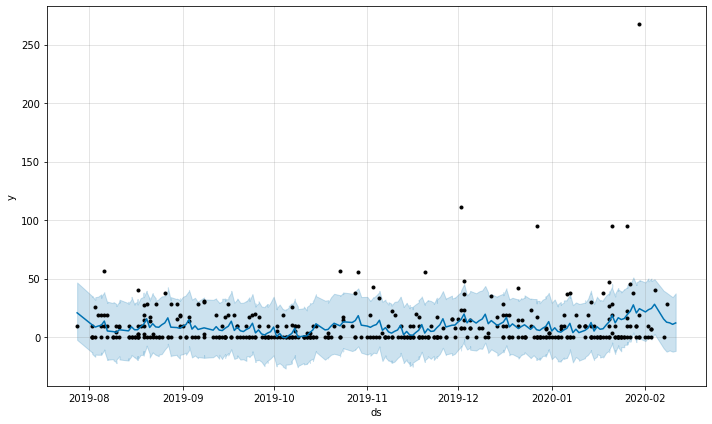

In [244]:
df = data[['sales', 'date']].rename(columns={"sales": "y", "date": "ds"})
m = Prophet(yearly_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=3)
forecast = m.predict(future)
fig1 = m.plot(forecast)

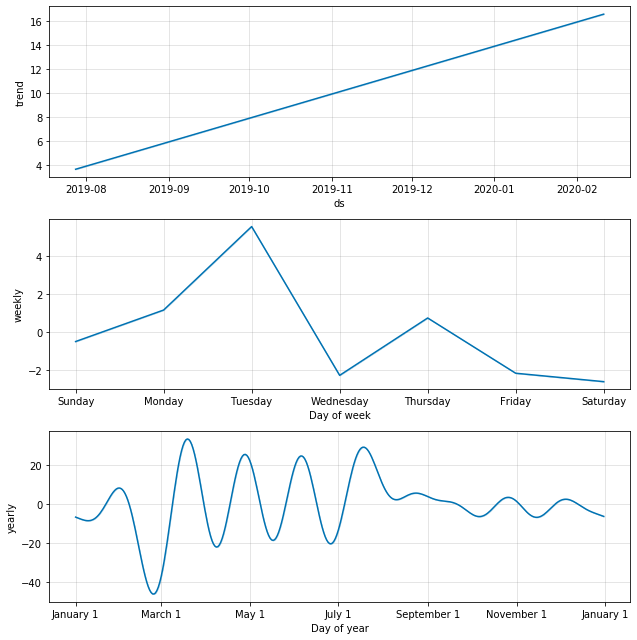

In [245]:
fig2 = m.plot_components(forecast)

In [246]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

## ML Modeling

In [247]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [248]:
data = data.drop(columns = ['date',
                     'search_term'
                    ])

In [249]:
data.T

,20986,22281,22269,23394,23416,23398,23413,23417,23405,23397,...,4179,7955,4182,4175,4178,4183,5181,5185,5183,5184
impressions,2,33,1,126,652,11,21,1735,19,1,...,78,13,11,11,123,5,58,14,1,31
clicks,2,1,1,1,3,2,1,5,5,1,...,3,2,1,1,2,2,1,2,1,1
CTR,1,0.030303,1,0.007937,0.004601,0.181818,0.047619,0.002882,0.263158,1,...,0.038462,0.153846,0.090909,0.090909,0.01626,0.4,0.017241,0.142857,1,0.032258
CpC,1.7,1.2,0.83,1.93,1.2,1.13,0.28,0.94,0.73,3.19,...,1.73,1.77,2.71,1.04,1.81,1.15,3.37,1.58,3.62,2.56
spend,3.4,1.2,0.83,1.93,3.6,2.26,0.28,4.72,3.63,3.19,...,5.18,3.53,2.71,1.04,3.61,2.3,3.37,3.15,3.62,2.56
RoAS,0,0.0791,0.1143,0.0492,0.0264,0.042,0,0.0402,0.082,0,...,0.0337,0,0,0,0,0.1238,0,0.009,0.086,0.117
sales,0,9.49,9.49,9.49,9.49,9.49,0,18.98,29.78,0,...,17.48,0,0,0,0,28.47,0,2.84,31.13,29.94
orders,0,1,1,1,1,1,0,2,3,0,...,2,0,0,0,0,2,0,1,1,2
units,0,1,1,1,1,1,0,2,5,0,...,2,0,0,0,0,3,0,1,1,2
ad_group,4704,4704,4704,4704,4704,4704,4704,4704,4704,4704,...,90,90,90,90,90,90,90,90,90,90


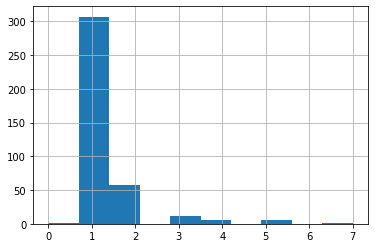

In [250]:
data.clicks.hist()

In [251]:
#getting dummies
dums = pd.get_dummies(data.match_type)
data = pd.concat([data, dums], axis = 1)
data = data.drop(columns = 'match_type')

In [252]:
campaign_type = data.ad_group.unique()
le_type = LabelEncoder()
le_type.fit(campaign_type)
le_type.classes_

array([  90, 4704])

In [253]:
data.ad_group = le_type.transform(data.ad_group)

In [254]:
data = data.dropna()
data

,impressions,clicks,CTR,CpC,spend,RoAS,sales,orders,units,ad_group,EXACT,PHRASE
20986,2,2,1.000000,1.70,3.40,0.0000,0.00,0,0,1,0,1
22281,33,1,0.030303,1.20,1.20,0.0791,9.49,1,1,1,1,0
22269,1,1,1.000000,0.83,0.83,0.1143,9.49,1,1,1,0,1
23394,126,1,0.007937,1.93,1.93,0.0492,9.49,1,1,1,0,1
23416,652,3,0.004601,1.20,3.60,0.0264,9.49,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4183,5,2,0.400000,1.15,2.30,0.1238,28.47,2,3,0,0,1
5181,58,1,0.017241,3.37,3.37,0.0000,0.00,0,0,0,0,1
5185,14,2,0.142857,1.58,3.15,0.0090,2.84,1,1,0,0,1
5183,1,1,1.000000,3.62,3.62,0.0860,31.13,1,1,0,0,1


In [255]:
y = data.CTR
X = data.drop(columns = ['CTR', 'clicks', 'spend', 'RoAS', 'sales', 'orders', 'units'])
X

,impressions,CpC,ad_group,EXACT,PHRASE
20986,2,1.70,1,0,1
22281,33,1.20,1,1,0
22269,1,0.83,1,0,1
23394,126,1.93,1,0,1
23416,652,1.20,1,1,0
...,...,...,...,...,...
4183,5,1.15,0,0,1
5181,58,3.37,0,0,1
5185,14,1.58,0,0,1
5183,1,3.62,0,0,1


In [256]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .2)

## model - linear regression

In [257]:
modelLR = LinearRegression()
modelLR.fit(Xtrain, ytrain,)
y_pred = modelLR.predict(X)
y_test_pred = modelLR.predict(Xtest)
modelLR.score(Xtest, ytest)

0.09927079590506262

In [262]:
modelLR.coef_

array([-0.00025319, -0.04141144,  0.04618701, -0.12571633,  0.12571633])

In [263]:
np.sqrt(mean_squared_error(y, y_pred))

0.028114454584112155

In [264]:
np.sqrt(mean_squared_error(ytest, y_test_pred))

0.06270418288029117

## model - decision tree

In [265]:
regressor = DecisionTreeRegressor()

regressor.fit(Xtrain, ytrain)
y_pred = regressor.predict(X)
y_test_pred = regressor.predict(Xtest)
regressor.score(Xtest, ytest)

0.9530785220064973

In [266]:
cross_val_score(regressor, X, y, cv=10)

array([0.91645215, 0.98238268, 0.951127  , 0.77615856, 0.97797119,
       0.97347246, 0.97054211, 0.66939805, 0.63874021, 0.83163789])

## model - random forest

In [267]:
regr = RandomForestRegressor()
regr.fit(Xtrain, ytrain)
y_pred = regr.predict(X)
y_test_pred = regr.predict(Xtest)
regr.score(Xtest, ytest)

0.9588476919720138

In [268]:
np.sqrt(mean_squared_error(y, y_pred)), np.sqrt(mean_squared_error(ytest, y_test_pred))

(0.03736872706280458, 0.06105565137916425)

## model - gradient boosting regressor - CTR

In [269]:
reg = GradientBoostingRegressor()

reg.fit(Xtrain, ytrain)
y_pred = reg.predict(X)
y_test_pred = reg.predict(Xtest)
reg.score(Xtest, ytest)

0.9442284291587687

In [270]:
np.sqrt(mean_squared_error(y, y_pred)), np.sqrt(mean_squared_error(ytest, y_test_pred))

(0.04429594993216386, 0.07107800154451813)

In [271]:
np.mean(cross_val_score(estimator = reg, X = Xtrain, y = ytrain, cv = 10))


0.9505389859218557

In [273]:
a = reg.feature_importances_
names = list(X.columns)
for num in zip(list(a), names):
    print(num)

(0.97888211013867, 'impressions')
(0.02071954327555849, 'CpC')
(0.00037250686389904034, 'ad_group')
(1.1370071215377416e-05, 'EXACT')
(1.4469650657006624e-05, 'PHRASE')


## model - gradient boosting regressor - sales

In [274]:
y = data.sales
X = data.drop(columns = ['CTR', 'clicks', 'spend', 'RoAS', 'sales', 'orders', 'units'])
X

,impressions,CpC,ad_group,EXACT,PHRASE
20986,2,1.70,1,0,1
22281,33,1.20,1,1,0
22269,1,0.83,1,0,1
23394,126,1.93,1,0,1
23416,652,1.20,1,1,0
...,...,...,...,...,...
4183,5,1.15,0,0,1
5181,58,3.37,0,0,1
5185,14,1.58,0,0,1
5183,1,3.62,0,0,1


In [275]:
reg = GradientBoostingRegressor()

reg.fit(Xtrain, ytrain)
y_pred = reg.predict(X)
y_test_pred = reg.predict(Xtest)
reg.score(Xtest, ytest)

0.9442284291587687

In [276]:
np.mean(cross_val_score(estimator = reg, X = Xtrain, y = ytrain, cv = 10))

0.950572623253634

In [277]:
np.sqrt(mean_squared_error(y, y_pred)), np.sqrt(mean_squared_error(ytest, y_test_pred))

(21.7187709722273, 0.07107800154451813)

In [278]:
a = reg.feature_importances_
names = list(X.columns)
for num in zip(list(a), names):
    print(num)

(0.9788789870770804, 'impressions')
(0.020719384767809147, 'CpC')
(0.0003764641768008487, 'ad_group')
(9.823861232506654e-06, 'EXACT')
(1.5340117077153475e-05, 'PHRASE')


## model - gradient boosting regressor - RoAS

In [279]:
y = data.RoAS
X = data.drop(columns = ['CTR', 'clicks', 'spend', 'RoAS', 'sales', 'orders', 'units'])

In [280]:
reg = GradientBoostingRegressor()

reg.fit(Xtrain, ytrain)
y_pred = reg.predict(X)
y_test_pred = reg.predict(Xtest)
reg.score(Xtest, ytest)

0.9442284291587687

In [281]:
a = reg.feature_importances_
names = list(X.columns)
for num in zip(list(a), names):
    print(num)

(0.978882944389982, 'impressions')
(0.02071870902424654, 'CpC')
(0.00037250686389903693, 'ad_group')
(1.0499604795230582e-05, 'EXACT')
(1.5340117077153452e-05, 'PHRASE')
